In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:

# Step 2: Load Dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
print(df.head())

# Step 3: Encode Labels (ham = 0, spam = 1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # ham: 0, spam: 1


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


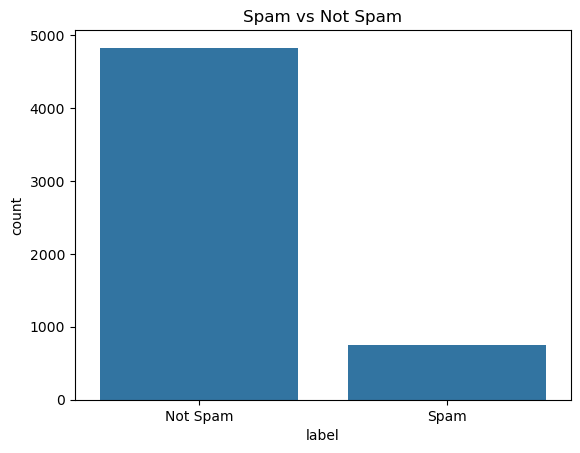

In [10]:
# Count of spam vs ham
sns.countplot(data=df, x='label')
plt.xticks(ticks=[0,1], labels=['Not Spam', 'Spam'])
plt.title("Spam vs Not Spam")
plt.show()


In [4]:
# Step 4: Data Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['clean_message'] = df['message'].apply(clean_text)


In [5]:

# Step 5: Vectorize Text (TF-IDF)
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['clean_message'])
y = df['label']

# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [7]:


# Step 8: Evaluate Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Predict Custom Message
def predict_message(msg):
    msg_clean = clean_text(msg)
    msg_vector = tfidf.transform([msg_clean])
    prediction = model.predict(msg_vector)[0]
    return "Spam" if prediction == 1 else "Not Spam"


Accuracy: 0.9641255605381166

Confusion Matrix:
 [[965   0]
 [ 40 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



In [8]:

# Example:
test_msg = "Congratulations! You've won a free iPhone. Claim now!"
print("Message:", test_msg)
print("Prediction:", predict_message(test_msg))


Message: Congratulations! You've won a free iPhone. Claim now!
Prediction: Spam


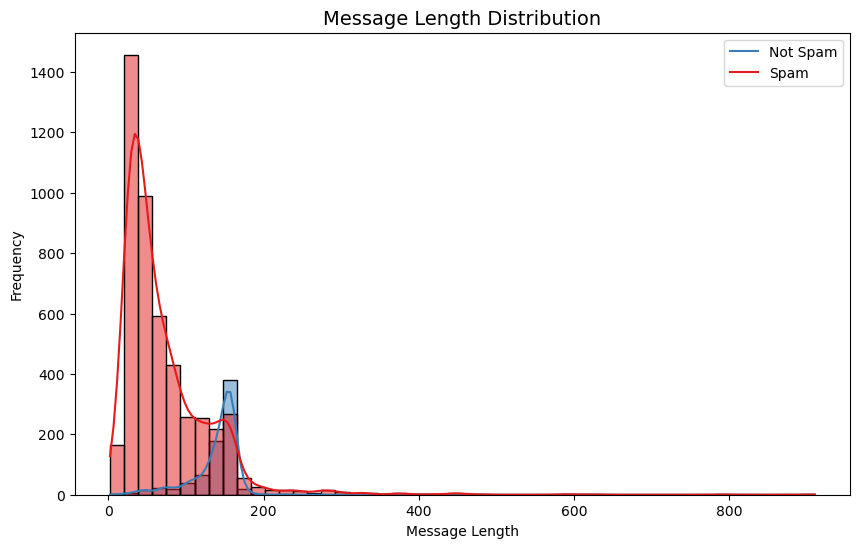

In [11]:
# Add a new column for message length
df['message_length'] = df['message'].apply(len)

# Plot message length distribution for spam and ham
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, palette='Set1')
plt.title('Message Length Distribution', fontsize=14)
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(labels=['Not Spam', 'Spam'])
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_8144\2471924621.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_df, x='Count', y='Word', palette='Reds_r')


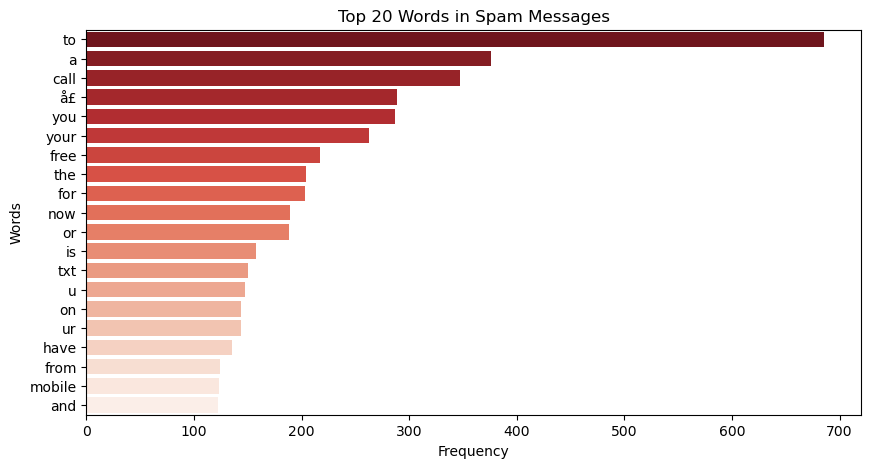

C:\Users\user\AppData\Local\Temp\ipykernel_8144\2471924621.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_df, x='Count', y='Word', palette='Blues_r')


In [16]:
from collections import Counter
from wordcloud import WordCloud

# Word frequency function
def get_top_words(messages, n=20):
    all_words = ' '.join(messages).split()
    return Counter(all_words).most_common(n)

# Separate spam and ham
spam_words = get_top_words(df[df['label'] == 1]['clean_message'])
ham_words = get_top_words(df[df['label'] == 0]['clean_message'])

# Convert to DataFrames
spam_df = pd.DataFrame(spam_words, columns=['Word', 'Count'])
ham_df = pd.DataFrame(ham_words, columns=['Word', 'Count'])

# Plot top spam words
plt.figure(figsize=(10,5))
sns.barplot(data=spam_df, x='Count', y='Word', palette='Reds_r')
plt.title('Top 20 Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Plot top ham words
plt.figure(figsize=(10,5))
sns.barplot(data=ham_df, x='Count', y='Word', palette='Blues_r')
plt.title('Top 20 Words in Ham Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


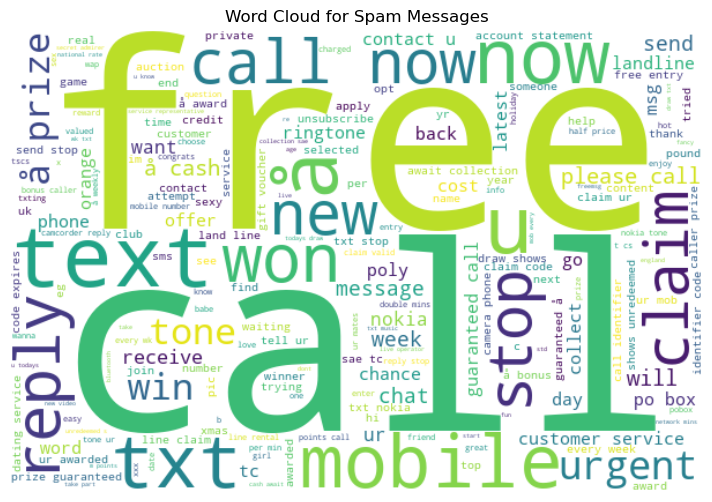

In [17]:
# Generate word clouds
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(' '.join(df[df['label'] == 1]['clean_message']))
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(' '.join(df[df['label'] == 0]['clean_message']))

# Show spam word cloud
plt.figure(figsize=(10,6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Spam Messages")
plt.show()

# Show ham word cloud
plt.figure(figsize=(10,6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Ham Messages")
plt.show()
